# Piauí: esforçado na educação, porém (ainda) pouco recompensado.

<img src="img/piaui.jpg" alt="Drawing" style="width: 600px;"/>

Avisos:


*   Todos os resultados impressos neste notebook foram feitos utilizando-se a base completa do Enem 2019;
*   Todas as medidas de desempenho foram baseadas na nota total, que é o somatório das provas de "Linguagens, Códigos e suas Tecnologias", "Ciências Humanas e suas Tecnologias", "Redação", "Matemática e suas Tecnologias" e "Ciências da Natureza e suas Tecnologias"; além disso, os dados somente foram considerados para análise caso o somatório das notas do candidato tenha sido diferente de zero;
*   Para complementar as análises, foram utilizados dados do IBGE, explicados adiante.
*   Boa leitura!


# 0. Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.font_manager as font_manager

from matplotlib.patches import Rectangle
from pandas_ods_reader import read_ods
from numpy import median

# 1. Leitura da base

In [2]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados = []
chunksize = 10**6

# os dados do ENEM podem ser obtidos em https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem
# a base utilizada - "Microdados do ENEM 2019" possui quase 3 GB de tamanho.

path = 'data/MICRODADOS_ENEM_2019.csv'
chunks = pd.read_csv(path, sep=';', encoding='latin1', chunksize = chunksize)
                     
for chunk in chunks:
    dado = chunk            
    colunas = ['NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','TP_ESCOLA','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC',
               'TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO','Q010', 'Q011']
    dados.append(dado[colunas])
    print('.')

df = pd.concat(dados)
df["NU_NOTA_TOTAL"] = df[provas].sum(axis=1)
df.shape

.
.
.
.
.
.


(5095270, 15)

In [3]:
df.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,Q010,Q011,NU_NOTA_TOTAL
0,Santarém,PA,1,1,1,1,1,472.9,466.0,369.1,497.3,780.0,A,A,2585.3
1,Mãe do Rio,PA,1,1,1,1,1,358.9,495.4,416.5,482.3,600.0,A,A,2353.1
2,Paragominas,PA,3,1,1,1,1,574.2,538.7,571.5,582.6,640.0,C,A,2907.0
3,São Sebastião da Boa Vista,PA,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,A,A,0.0
4,Juruti,PA,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,A,B,0.0


# 2. Introdução e análises

Certa vez li uma matéria sobre investimento por aluno na educação pública . Era uma reportagem que mostrava uma aparente correlação entre o orçamento para a educação pública e o desempenho estudantil, segundo o Ideb (Índice de Desenvolvimento da Educação Básica) em diferentes estados brasileiros; porém, focando nos dez estados com os piores índices. Tal leitura foi há alguns anos. 
Eis os dois primeiros parágrafos daquela reportagem de 2011:


<img src="img/noticia_educacao.jpg" alt="Drawing" style="width: 600px;"/>

**Fonte:** https://educacao.uol.com.br/noticias/2011/02/22/seis-dos-dez-estados-com-pior-qualidade-de-educacao-investem-menos-por-aluno.htm

Desde a reportagem até o ENEM 2019 passaram-se quase 10 anos.
 
Vamos verificar se o desempenho dos candidatos do Enem 2019 nos seis estados citados na notícia sugere algum avanço após esse período. A figura a seguir apresenta um diagrama de caixa, comparando o desempenho destes seis estados com o restante dos estados brasileiros, mas apenas dos candidatos que cursam ou cursaram o ensino médio em escola pública.




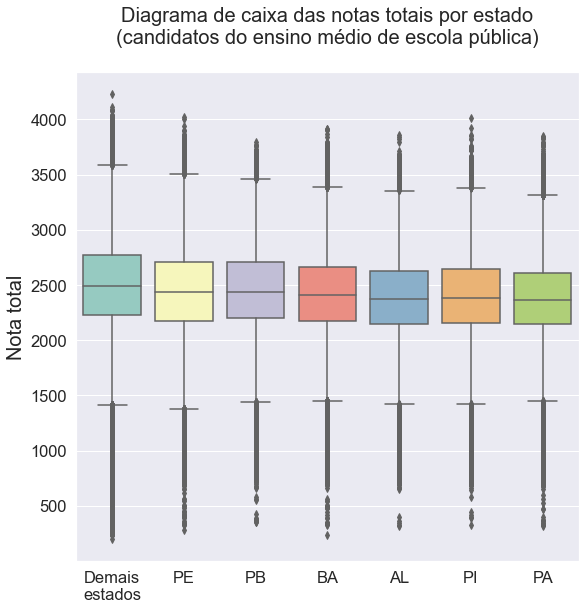

In [4]:
#Considerar os dados sem notas zeros.
dados_sem_notas_zero = df.query("NU_NOTA_TOTAL != 0")

# Atribuir "DEMAIS ESTADOS" para o nome dos estados que não são citados na notícia
dados_BR = dados_sem_notas_zero.query("SG_UF_RESIDENCIA != 'AL' & \
SG_UF_RESIDENCIA != 'BA' & \
SG_UF_RESIDENCIA != 'PA' & \
SG_UF_RESIDENCIA != 'PB' & \
SG_UF_RESIDENCIA != 'PE' & \
SG_UF_RESIDENCIA != 'PI'")
pd.options.mode.chained_assignment = None 
dados_BR["SG_UF_RESIDENCIA"] = 'Demais\nestados'

#Criar um df apenas para os estados da notícia
dados_BR_especificos = dados_sem_notas_zero.query("SG_UF_RESIDENCIA == 'AL' | \
SG_UF_RESIDENCIA == 'BA' | \
SG_UF_RESIDENCIA == 'PA' | \
SG_UF_RESIDENCIA == 'PB' | \
SG_UF_RESIDENCIA == 'PE' | \
SG_UF_RESIDENCIA == 'PI'")

#Consolidando os dois dados
dados_BR = dados_BR.append(dados_BR_especificos, ignore_index = True)

# Portanto, o df dados_BR possui 7 valores para estados: 
# AL, BA, PA, PB, PE, PI e DEMAIS ESTADOS (onde não constam o desempenho dos 6 primeiros) 

# Ordernar por mediana (decrescente)
dados_BR_escola_publica = dados_BR.query("TP_ESCOLA == 2")
mediana_ordenada_escola_publica = dados_BR.groupby('SG_UF_RESIDENCIA')['NU_NOTA_TOTAL'].median().sort_values(ascending=False).index
mediana_ordenada_escola_publica = mediana_ordenada_escola_publica.tolist()

# Parâmetros do gráfico
sns.set(style="darkgrid", font_scale=1.5)

Figura_1, ax = plt.subplots(figsize=(9, 9))
sns.boxplot(x="SG_UF_RESIDENCIA", y = "NU_NOTA_TOTAL",ax=ax, data = dados_BR_escola_publica, palette="Set3",order=mediana_ordenada_escola_publica)
plt.title("Diagrama de caixa das notas totais por estado\n(candidatos do ensino médio de escola pública)\n",fontsize=20)
plt.ylabel("Nota total",fontsize=20)
ax.set(ylim=(1, None))
plt.xlabel("")

plt.show()

Conforme pode ser observado, todos os estados citados na reportagem apresentaram uma curva de desempenho inferior aos demais estados do Brasil.
Um ponto de atenção, em especial, é  o estado do Pará, onde quase metade dos *outliers* das maiores notas  estão dentro do *whisker* superior do conjunto formado pelos demais estados.
Mas será que esses seis estados são justamente os que apresentaram o pior desempenho de candidatos oriundos do ensino público no Enem 2019?

Para responder a esta questão, analisamos a figura seguinte, que traz a mediana dos dez menores desempenhos dos candidatos que cursam ou cursaram o ensino médio em escola pública. Como comparação, também traz a informação dos candidatos que cursam ou cursaram o ensino médio em escolas privadas dos respectivos estados.

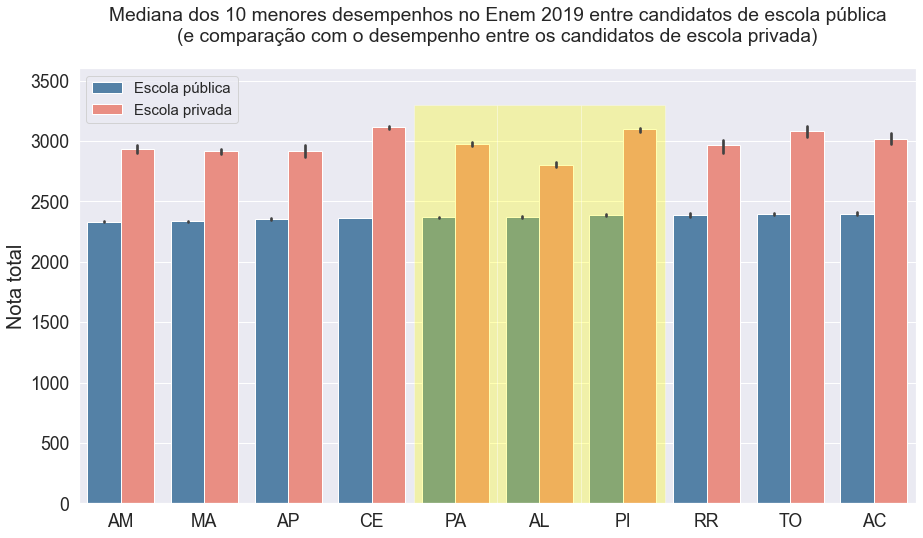

In [5]:

# Considerar os dados sem notas zeros e de escolas públicas e privadas
dados_sem_notas_zero = df.query("NU_NOTA_TOTAL != 0 & (TP_ESCOLA == 2 | TP_ESCOLA == 3)")
dados_sem_notas_zero_escola_publica = dados_sem_notas_zero.query("TP_ESCOLA == 2")
dados_sem_notas_zero_escola_privada = dados_sem_notas_zero.query("TP_ESCOLA == 3")

# Calcular a mediana para ordenar corretamente no gráfico
mediana_escola_publica = dados_sem_notas_zero_escola_publica.groupby('SG_UF_RESIDENCIA')['NU_NOTA_TOTAL'].median()
mediana_escola_publica_ordenada = mediana_escola_publica.sort_values(ascending=True).index
mediana_escola_publica_ordenada = mediana_escola_publica_ordenada.tolist()[0:10]

# Parâmetros do gráfico
sns.set(style="darkgrid", font_scale=1.6)
Figura_2, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(ax=ax,x="SG_UF_RESIDENCIA", y="NU_NOTA_TOTAL", data=dados_sem_notas_zero, hue="TP_ESCOLA",palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"]),
                 estimator=median,order=mediana_escola_publica_ordenada)
ax.set(ylim=(0, 3600))
ax.set_ylabel("Nota total",fontsize=20)
ax.set_xlabel("")

labels=["Escola pública","Escola privada"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels,loc='upper left',fontsize=15)
plt.title("Mediana dos 10 menores desempenhos no Enem 2019 entre candidatos de escola pública\n(e comparação com o desempenho entre os candidatos de escola privada)\n")

ax.add_patch(Rectangle((4 - .5, 0 - .5), 1, 3300, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((5 - .5, 0 - .5), 1, 3300, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((6 - .5, 0 - .5), 1, 3300, facecolor="yellow",alpha=0.3))

plt.show()

De acordo com a figura acima, dentre os dez estados que apresentaram os piores desempenhos no Enem 2019 (escola pública), constam três (PA, AL e PI) dos seis estados citados naquela reportagem de 2011.

No entanto, o que mais chama a atenção é a diferença dos resultados da prova entre candidatos da escola pública em relação aos da escola privada. Vamos investigar um pouco melhor isso a seguir. A próxima figura apresenta o mesmo diagrama de caixa abordado anteriormente; porém, somente com os candidatos do ensino privado.




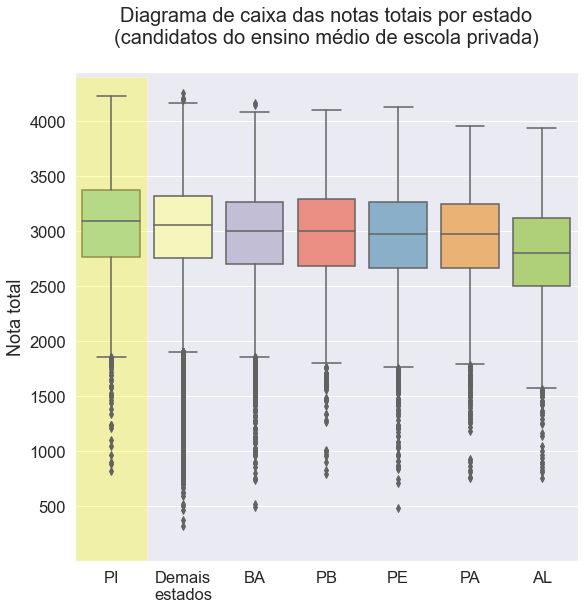

In [6]:
# Ordernar por mediana (decrescente)
dados_BR_escola_privada = dados_BR.query("TP_ESCOLA == 3")
mediana_ordenada_escola_privada = dados_BR_escola_privada.groupby('SG_UF_RESIDENCIA')['NU_NOTA_TOTAL'].median().sort_values(ascending=False).index
mediana_ordenada_escola_privada = mediana_ordenada_escola_privada.tolist()

# Parâmetros do gráfico
sns.set(style="darkgrid", font_scale=1.5)
Figura_3, ax = plt.subplots(figsize=(9, 9))
sns.set_theme(style="darkgrid")
sns.boxplot(x="SG_UF_RESIDENCIA", y = "NU_NOTA_TOTAL",ax=ax, data = dados_BR_escola_privada, palette="Set3",order = mediana_ordenada_escola_privada)
plt.title("Diagrama de caixa das notas totais por estado\n(candidatos do ensino médio de escola privada)\n",fontsize=20)
plt.ylabel("Nota total")
ax.set(ylim=(1, None))
plt.xlabel("")

# Adicionar destaque amarelo
ax.add_patch(Rectangle((0 - .5, 0 - .5), 1, 4400, facecolor="yellow",alpha=0.3))

plt.show()

As diferenças das curvas dos desempenhos dos candidatos daqueles seis estados citados na notícia inicial, em comparação com o conjunto formado pelos demais estados do Brasil, não são tão significativas quanto foram para o ensino público, com exceção de Alagoas.

Nota-se, ainda, que o desempenho dos candidatos que cursam ou cursaram o ensino privado no Piauí ficou acima da mediana do conjunto de candidatos dos demais estados do Brasil; ou seja, enquanto no ensino público o Estado do Piauí "puxa" a mediana do Brasil para baixo (conforme foi visto na Figura 1), no ensino privado ocorre o oposto.

Considerando todos os estados do Brasil, seria o Piauí aquele com a maior desigualdade de desempenho entre candidatos do ensino público e privado? A figura a seguir apresenta as dez maiores diferenças da mediana do desempenho entre esses candidatos no Enem 2019.


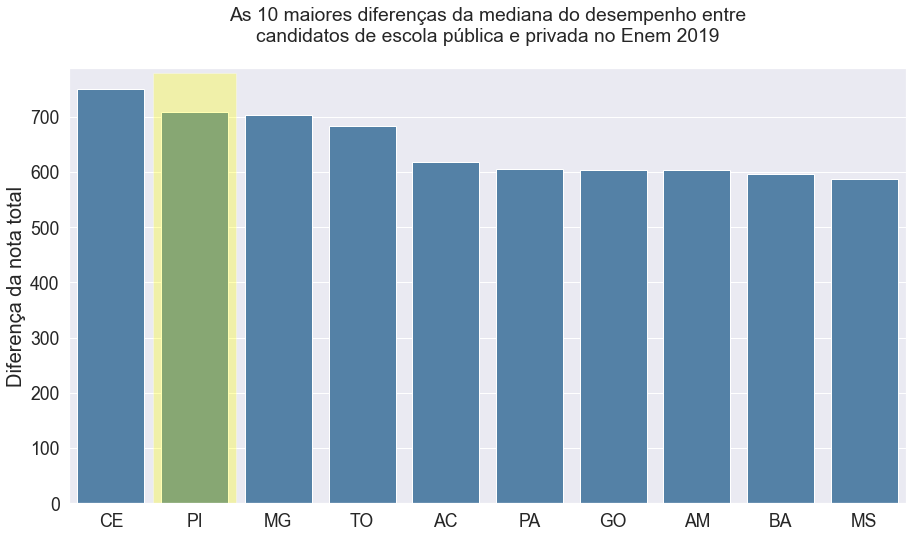

In [7]:
# Considerar os dados sem notas zeros e de escolas públicas e privadas
dados_sem_notas_zero = df.query("NU_NOTA_TOTAL != 0 & (TP_ESCOLA == 2 | TP_ESCOLA == 3)")
dados_sem_notas_zero_escola_publica = dados_sem_notas_zero.query("TP_ESCOLA == 2")
dados_sem_notas_zero_escola_privada = dados_sem_notas_zero.query("TP_ESCOLA == 3")

# Ordenar por mediana (decrescente)
mediana_escola_publica = dados_sem_notas_zero_escola_publica.groupby('SG_UF_RESIDENCIA')['NU_NOTA_TOTAL'].median()
mediana_escola_privada = dados_sem_notas_zero_escola_privada.groupby('SG_UF_RESIDENCIA')['NU_NOTA_TOTAL'].median()
delta_notas = mediana_escola_privada -mediana_escola_publica
delta_notas_ordenado = delta_notas.sort_values(ascending=False).index
delta_notas_ordenado = delta_notas_ordenado.tolist()[0:10]

df_delta_notas = pd.DataFrame()
df_delta_notas["UF"] = delta_notas_ordenado
df_delta_notas["delta"] = delta_notas.sort_values(ascending=False).tolist()[0:10]

# Parâmetros do gráfico
sns.set(style="darkgrid", font_scale=1.6)
Figura_4, ax = plt.subplots(figsize=(15,8));

ax = sns.barplot(ax=ax,x="UF", y="delta", data=df_delta_notas, palette = sns.color_palette(palette = ["SteelBlue"]),estimator=median,order=delta_notas_ordenado);
ax.set_ylabel("Diferença da nota total",fontsize=20)
ax.set_xlabel("")

plt.title("As 10 maiores diferenças da mediana do desempenho entre\ncandidatos de escola pública e privada no Enem 2019\n")

# Adicionar destaque amarelo
ax.add_patch(Rectangle((1 - .5, 0 - .5), 1, 780, facecolor="yellow",alpha=0.3))

plt.show()

Após analisar a figura acima, verifica-se que Piauí não foi o primeiro, mas o segundo estado com a maior desigualdade entre os desempenhos do Enem 2019 por tipo de escola.

Neste momento, já temos as seguintes constatações sobre Piauí:

*   Um dos seis estados que menos recebia investimento por aluno no Brasil em 2011;
*   Apresentou baixo resultado no Ideb da rede estadual naquele ano;
*   O seu ensino público no Enem 2019 figurou entre as últimas colocações do Brasil;
*   O seu ensino privado, por sua vez, ficou acima da mediana do Brasil; 
*   Foi o segundo estado com maior disparidade de desempenho entre o ensino privado e público no Enem 2019.

A partir dessas reflexões surgem vários questionamentos:



*   O que pode ser feito para melhorar o ensino público e atenuar a diferença no estado do Piauí?
*   Qual a expectativa sobre o futuro? Um aumento ou diminuição da disparidade do desempenho entre os ensinos públicos e privados?
*   Quais outros indicadores socioeconômicos podem ser correlacionados com tal diferença e, portanto, monitorados para futuras previsões, análises e ações?




Cada um destes questionamentos pode resultar em novas investigações. Para a presente análise, vamos buscar um indicador socioecônomico chamado índice de Gini. Antes, uma breve explicação a respeito dele:

**índice (ou coeficiente) de Gini**: Medida de desigualdade relativa obtida a partir da Curva de Lorenz, que relaciona o percentual acumulado da população em ordem crescente de rendimentos (eixo x) e o percentual acumulado de rendimentos (eixo y). Quando os percentuais acumulados de população correspondem aos percentuais acumulados de rendimentos (10% da população com 10% dos rendimentos, por exemplo), tem se a linha de perfeita igualdade. A Curva de Lorenz representa a distribuição real de rendimentos de uma dada população tendo, em geral, formato convexo. Quanto mais afastada da linha de perfeita igualdade, mais desigual a distribuição. **O índice de Gini é uma medida numérica que representa o afastamento de uma dada distribuição de renda (Curva de Lorenz) da linha de perfeita igualdade, variando de “0” (situação onde não há desigualdade) e “1” (desigualdade máxima, ou seja, toda a renda apropriada por um único indivíduo)**

**Fonte:** Síntese de Indicadores Sociais. Uma Análise das Condições de Vida. IBGE, 2018.
<br> 
<br>
A próxima figura traz os valores do índice de Gini desde o seu início (2012) até 2019, por estado. O tamanho de cada barra representa o somatório do índice de Gini em cada ano. Dessa maneira, é uma forma apropriada de representar, em um só gráfico, todo o histórico desse índice disponível no portal do IBGE.


In [8]:
# os dados podem ser obtidos em https://www.ibge.gov.br/estatisticas/sociais/rendimento-despesa-e-consumo/17270-pnad-continua.html?edicao=27257&t=resultados
path = 'data/PNAD_Continua_2019_Rendimento_de_Todas_as_Fontes.ods'
sheet_name = "Trab_hab_Outros_efetivo"
df_ibge = read_ods(path, sheet_name)
df_ibge.head()

,csas,Nivel_territorial,Abertura_geografica,Tipo,ind,classe,sub_classe,Unid,2012,2013,2014,2015,2016,2017,2018,2019
0,10110001,País,Brasil,Valor,"População residente, com rendimento",Tipo de Rendimento,Todas as fontes¹,(1 000 pessoas),119957.0,121765.0,123863.0,124710.0,124992.0,125784.0,128257.0,131229.0
1,10110002,País,Brasil,Valor,"População residente, com rendimento",Tipo de Rendimento,Todos os trabalhos¹,(1 000 pessoas),86142.0,87640.0,89007.0,89390.0,88469.0,88777.0,90116.0,92458.0
2,10110003,País,Brasil,Valor,"População residente, com rendimento",Tipo de Rendimento,Outras fontes,(1 000 pessoas),46632.0,46938.0,47254.0,47850.0,49038.0,49697.0,51751.0,52682.0
3,10110004,País,Brasil,Valor,"População residente, com rendimento",Tipo de Rendimento,Aposentadoria e pensão,(1 000 pessoas),25820.0,25974.0,27065.0,27356.0,28449.0,29021.0,30448.0,30734.0
4,10110005,País,Brasil,Valor,"População residente, com rendimento",Tipo de Rendimento,Aluguel e arrendamento,(1 000 pessoas),3474.0,3409.0,3164.0,3461.0,3686.0,3949.0,4263.0,4468.0


In [9]:
# Capturar apenas os dados do índice de Gini por estado
df_gini = df_ibge.query("classe=='Gini'")
df_gini_por_Estado = df_gini.copy().query("Nivel_territorial=='Unidade da Federação' & ind == 'Índice de Gini do rendimento médio mensal real das pessoas de 14 anos ou mais de idade, em todos os trabalhos, a preços médios do ano' & \
Tipo == 'Valor'")

# Tratar os nomes dos estados dos dados (IBGE fornece os nomes dos estados por extenso)
dic = {"Acre": "AC", "Alagoas": "AL", "Amapá": "AP","Amazonas":"AM", "Bahia":"BA", "Ceará":"CE", "Distrito Federal":"DF", "Espirito Santo":"ES", "Goiás":"GO", \
      "Maranhão":"MA","Mato Grosso":"MT","Mato Grosso do Sul":"MS","Minas Gerais":"MG","Pará":"PA","Paraíba":"PB","Paraná":"PR","Pernambuco":"PE", "Piauí":"PI", \
      "Rio de Janeiro":"RJ","Rio Grande do Norte":"RN","Rio Grande do Sul":"RS","Rondônia":"RO","Roraima":"RR","Santa Catarina":"SC","São Paulo":"SP", \
      "Sergipe":"SE","Tocantins":"TO"}
df_gini_por_Estado['Abertura_geografica'].replace(dic, inplace=True)

# Realizar novo filtro no df do índice de Gini, dessa vez para capturar apenas as colunas necessárias na análise.
# Além disso, alterar o índice do df para o estado.
df_gini_por_Estado = df_gini_por_Estado[["Abertura_geografica","2012","2013","2014","2015","2016","2017","2018","2019"]]
df_gini_por_Estado.set_index("Abertura_geografica",inplace=True, drop=True)
df_gini_por_Estado.head()

,2012,2013,2014,2015,2016,2017,2018,2019
Abertura_geografica,,,,,,,,
RO,0.455,0.432,0.422,0.427,0.422,0.416,0.478,0.449
AC,0.511,0.504,0.476,0.497,0.501,0.494,0.501,0.497
AM,0.530,0.528,0.509,0.500,0.516,0.552,0.495,0.514
RR,0.520,0.536,0.513,0.529,0.509,0.485,0.543,0.529
PA,0.514,0.506,0.487,0.489,0.487,0.486,0.536,0.509


In [10]:
# Ordem do índice Geni acumulado de 2012 a 2019
ordem_soma_gini = df_gini_por_Estado.sum(axis=1).sort_values()
ordem_soma_gini

Abertura_geografica
SC    3.230
RO    3.501
MT    3.522
GO    3.538
AL    3.634
MS    3.641
PR    3.646
ES    3.756
RS    3.756
MG    3.761
RJ    3.802
TO    3.901
AP    3.904
AC    3.981
MA    3.987
SP    3.993
PA    4.014
RN    4.024
AM    4.144
RR    4.164
CE    4.186
PB    4.207
PE    4.210
BA    4.243
SE    4.322
PI    4.418
DF    4.439
dtype: float64

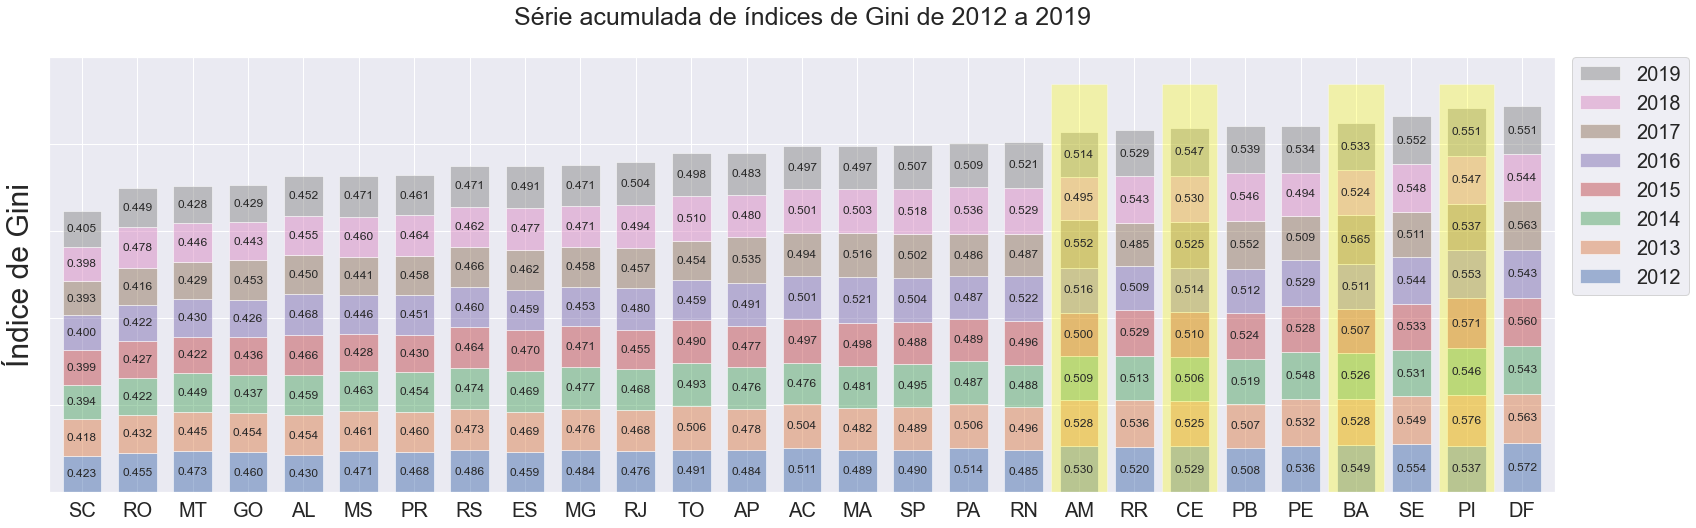

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import Rectangle

# Utilizei a ordem obtida na célula anterior pois eu não consegui gerar o gráfico de barras empilhado ordenado automaticamente.
grafico_barras = pd.DataFrame()
grafico_barras = pd.concat([df_gini_por_Estado.loc['SC',:],df_gini_por_Estado.loc['RO',:],df_gini_por_Estado.loc['MT',:],df_gini_por_Estado.loc['GO',:],df_gini_por_Estado.loc['AL',:],\
                            df_gini_por_Estado.loc['MS',:],df_gini_por_Estado.loc['PR',:],df_gini_por_Estado.loc['RS',:],df_gini_por_Estado.loc['ES',:],df_gini_por_Estado.loc['MG',:],\
                            df_gini_por_Estado.loc['RJ',:],df_gini_por_Estado.loc['TO',:],df_gini_por_Estado.loc['AP',:],df_gini_por_Estado.loc['AC',:],df_gini_por_Estado.loc['MA',:],\
                            df_gini_por_Estado.loc['SP',:],df_gini_por_Estado.loc['PA',:],df_gini_por_Estado.loc['RN',:],df_gini_por_Estado.loc['AM',:],df_gini_por_Estado.loc['RR',:],\
                            df_gini_por_Estado.loc['CE',:],df_gini_por_Estado.loc['PB',:],df_gini_por_Estado.loc['PE',:],df_gini_por_Estado.loc['BA',:],df_gini_por_Estado.loc['SE',:],\
                            df_gini_por_Estado.loc['PI',:],df_gini_por_Estado.loc['DF',:]],axis=1)

# Parâmetros do gráfico
sns.set_theme(style="darkgrid")
Figura_5, ax = plt.subplots(figsize=(27,8))
ax = grafico_barras.T.plot.bar(ax=ax,stacked=True,grid=True,fontsize=20,alpha=0.5,width=0.7)

handles, labels = ax.get_legend_handles_labels() # Inverter a ordem dos labels da legenda (estava aparecendo na ordem crescente, 2012 acima e 2019 abaixo)
ax.legend()

plt.title("Série acumulada de índices de Gini de 2012 a 2019\n", fontsize=25)    
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.05, 1), loc='upper center', borderaxespad=0.,fontsize=20)    
ax.set_ylabel('Índice de Gini',fontsize=30)

# Rotina para adicionar os labels no próprio gráfico
for rect in ax.patches:
    # Encontrar os valores de cada seção empilhada
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # A altura da barra é o valor do dado e é utilizado como o próprio label
    label_text = f'{height:.3f}'  # f'{height:.2f}' to format decimal values
    
    # Obtenção dos parâmetros para centralizar os labels
    label_x = x + width / 2
    label_y = y + height / 2

    # Para futuros reusos: a fim de evitar que fique texto residual, caso tenha algum valor = 0, ele não postará o label "0"  
    if height != 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)


# Adicionar destaques amarelos para os dados dos estados com desempenho no Enem 2019 mais desiguais entre escola pública e privada
someX, someY = ordem_soma_gini.index.get_loc('PI'),0
ax.add_patch(Rectangle((someX - .5, someY - .5), 1, 5.2, facecolor="yellow",alpha=0.3))
someX, someY = ordem_soma_gini.index.get_loc('AM'),0
ax.add_patch(Rectangle((someX - .5, someY - .5), 1, 5.2, facecolor="yellow",alpha=0.3))
someX, someY = ordem_soma_gini.index.get_loc('CE'),0
ax.add_patch(Rectangle((someX - .5, someY - .5), 1, 5.2, facecolor="yellow",alpha=0.3))
someX, someY = ordem_soma_gini.index.get_loc('BA'),0
ax.add_patch(Rectangle((someX - .5, someY - .5), 1, 5.2, facecolor="yellow",alpha=0.3))


# Esconder os valores do eixo Y já que não agregam valor ao gráfico
ax.set_yticklabels([])

# Rotacionar os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)

# Ajustar limite do eixo y
ax.set(ylim=(0, 5))

plt.show()

**Fonte:** https://www.ibge.gov.br/estatisticas/sociais/rendimento-despesa-e-consumo/17270-pnad-continua.html?edicao=27257&t=resultados

Como pode ser observado, o estado do Piauí é o segundo com a renda mais desigual no Brasil.

Além do Piauí, outros três estados que estão entre os que tiveram maior desigualdade no desempenho no Enem 2019 também estão entre os dez que apresentaram as maiores desigualdades de renda: AM, CE e BA.

Vamos verificar, agora, os dez estados menos desiguais no desempenho no Enem 2019, destacando-se os estados que estão entre os dez menos desiguais na renda, conforme a figura anterior.



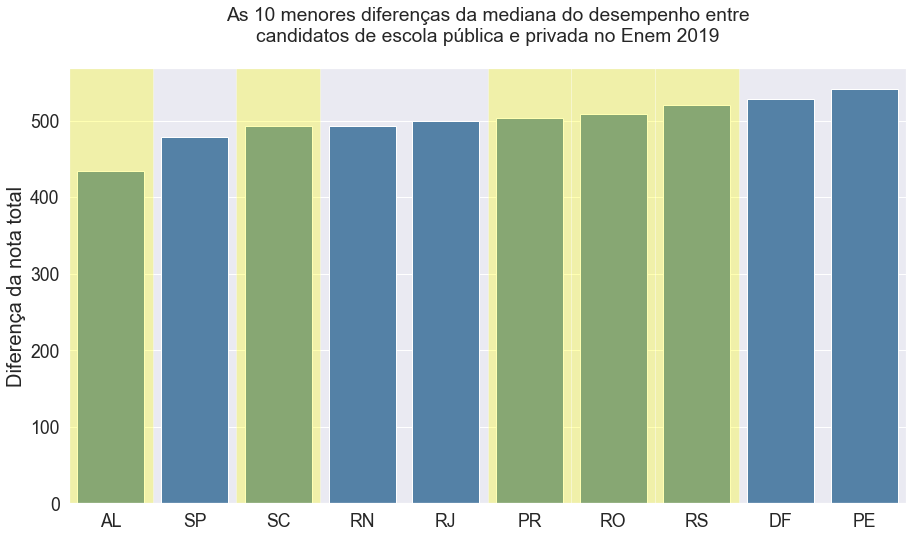

In [12]:
# Considerar os dados sem notas zeros e de escolas públicas e privadas
dados_sem_notas_zero = df.query("NU_NOTA_TOTAL != 0 & (TP_ESCOLA == 2 | TP_ESCOLA == 3)")
dados_sem_notas_zero_escola_publica = dados_sem_notas_zero.query("TP_ESCOLA == 2")
dados_sem_notas_zero_escola_privada = dados_sem_notas_zero.query("TP_ESCOLA == 3")

# Calcular a mediana para ordenar corretamente no gráfico
mediana_escola_publica = dados_sem_notas_zero_escola_publica.groupby('SG_UF_RESIDENCIA')['NU_NOTA_TOTAL'].median()
mediana_escola_privada = dados_sem_notas_zero_escola_privada.groupby('SG_UF_RESIDENCIA')['NU_NOTA_TOTAL'].median()
delta_notas = mediana_escola_privada -mediana_escola_publica
delta_notas_ordenado = delta_notas.sort_values(ascending=True).index
delta_notas_ordenado = delta_notas_ordenado.tolist()[0:10]

df_delta_notas = pd.DataFrame()
df_delta_notas["UF"] = delta_notas_ordenado
df_delta_notas["delta"] = delta_notas.sort_values(ascending=True).tolist()[0:10]


# Parâmetros do gráfico
sns.set(style="darkgrid", font_scale=1.6)

Figura_6, ax = plt.subplots(figsize=(15,8))

ax = sns.barplot(ax=ax,x="UF", y="delta", data=df_delta_notas, palette = sns.color_palette(palette = ["SteelBlue"]),estimator=median,order=delta_notas_ordenado)

ax.set_ylabel("Diferença da nota total",fontsize=20)
ax.set_xlabel("")

labels=["Escola Pública","Escola Privada"]

plt.title("As 10 menores diferenças da mediana do desempenho entre\ncandidatos de escola pública e privada no Enem 2019\n")

# Adicionar destaques amarelospara os estados com menor desigualdade de renda
ax.add_patch(Rectangle((0 - .5, 0 - .5), 1, 600, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((2 - .5, 0 - .5), 1, 600, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((5 - .5, 0 - .5), 1, 600, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((6 - .5, 0 - .5), 1, 600, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((7 - .5, 0 - .5), 1, 600, facecolor="yellow",alpha=0.3))

plt.show()

Constata-se que cinco estados (AL, SC, PR, RO e RS) estão entre os que apresentaram as menores diferenças entre ensino público e privado no desempenho no Enem 2019 e que também figuram entre os dez estados com menor desigualdade na renda. Repare que isso não indica necessariamente que o desempenho do ensino público nestes estados foi bom; mas, apenas, foi menos desigual em relação ao ensino privado.

Levanta-se uma hipótese: seria a falta de investimento por aluno na educação pública somada à alta desigualdade na renda a responsável pelas maiores diferenças de desempenho dos candidatos no Enem 2019 entre os ensinos público e privado?

Para respondê-la são necessários mais dados; por exemplo, pode-se obter a série histórica de investimentos na educação pública por aluno na educação fundamental e estudar a correlação no desempenho do Enem alguns anos depois (quando o aluno estava terminando o ensino médio). Fica, portanto, a primeira sugestão de um trabalho futuro.

Também vale a ressalva que já existem muitos estudos nesta temática (abaixo uma lista de alguns deles); portanto, é muito importante valer-se de análises e conclusões publicadas para enriquecer a qualidade de novos estudos.

Exemplos de estudos no assunto:


*   "Um estudo do investimento público em educação básica no Brasil e do desempenho dos alunos em avaliações nacionais por Unidade Federativa no período de 1998 a 2007" (2009), por Fernando Gasparotto Puccinelli e Valmor Slomski;
*   "Investimento público em educação básica e o desempenho dos alunos em avaliações nacionais: um estudo nos municípios pertencentes à associação dos municípios da encosta superior do nordeste do Rio Grande do Sul - Amesne - RS" (2014), por Nelton Carlos Conte e Sheila Donin;
*   "Gasto público em educação e desempenho escolar" (2015), por Joana Monteiro;
*   "Relação entre investimento em educação e índices educacionais para municípios gaúchos no período de 2005 a 2015" (2018), por Gabriela Drevnovicz Silveira et al.
<br>


Voltando ao Piauí e considerando as análises feitas até o momento, temos consolidada uma preocupação em particular sobre a educação pública deste estado. Um dos questionamentos que fizemos anteriormente foi:

"Qual a expectativa sobre o futuro? Um aumento ou diminuição da disparidade do desempenho entre os ensinos públicos e privados?"

Sabe-se que uma das maneiras de obter melhores condições socioeconômicas é com a educação. E o acesso ao ensino superior público e gratuito, que é o principal interesse dos candidatos que realizam o Enem, é crucial nesse processo. A primeira etapa é a fundamentação de uma sólida formação infantil, fundamental e média. Mas outra etapa, de curtíssima duração, mas de extrema importância, é o acesso aos locais da prova nos dias do exame.

Um indicador que podemos recorrer para levantar possíveis problemas nos diferentes estados e regiões é a taxa de abstenção dos candidatos. Sabe-se, também, que a realidade do transporte é significativamente diferente entre aqueles candidatos que possuem carro ou moto em suas residências e aqueles que não os possuem.

Primeiramente, vamos verificar este indicador para os candidatos que não possuem transporte próprio em suas residências. A figura a seguir mostra a taxa de abstenção de candidatos das capitais e das demais regiões, por estado, mas apenas dos que não possuem moto ou carro.

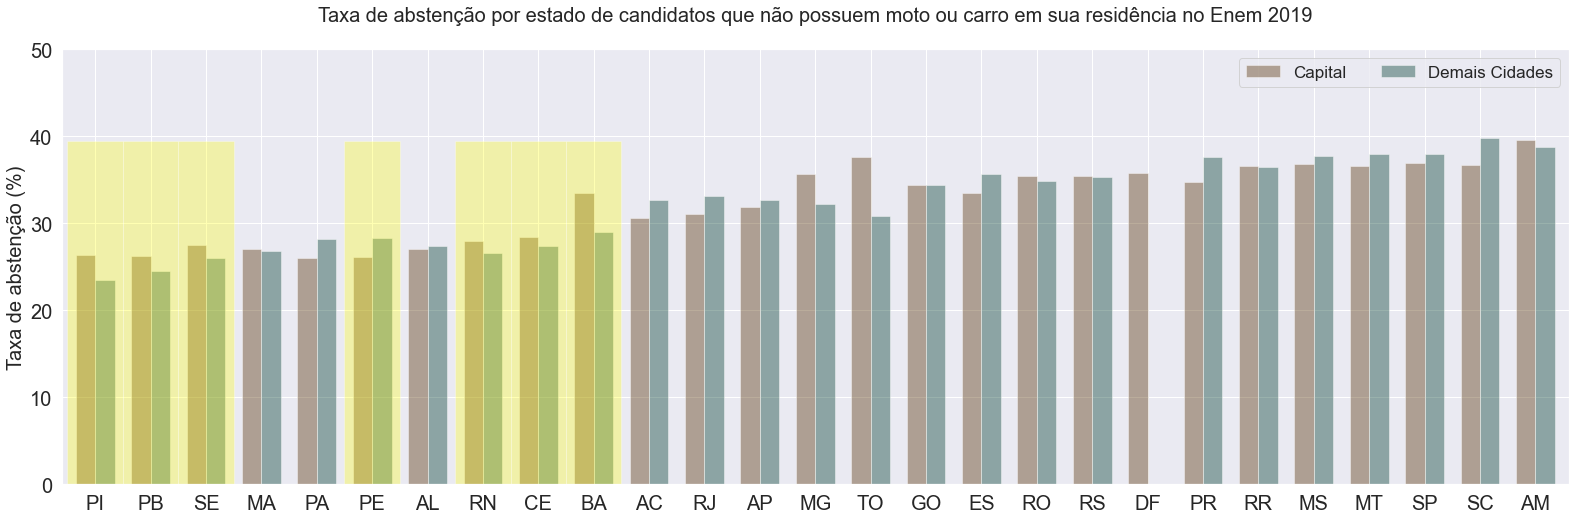

In [13]:
# Lista das capitais dos estados para serem utilizadas no filtro
capitais = ["Rio Branco", "Maceió", "Macapá", "Manaus", "Salvador", "Fortaleza",
"Vitória","Goiânia", "São Luís", "Cuiabá", "Campo Grande", "Belo Horizonte",
"Belém", "João Pessoa", "Curitiba", "Recife", "Teresina", "Rio de Janeiro", "Natal",
"Porto Alegre", "Porto Velho", "Boa Vista", "Florianópolis", "São Paulo", "Aracaju",
"Palmas", "Brasília"]

# Considerar apenas candidatos que não possuem meios de transporte na residência
dados_candidatos_sem_transporte = df.copy().query("Q010 == 'A' & Q011 == 'A'") 

# Considerar todos os candidatos que residem em capitais
dados_candidatos_capital = dados_candidatos_sem_transporte[dados_candidatos_sem_transporte['NO_MUNICIPIO_RESIDENCIA'].isin(capitais)].copy()

# Preencher a primeira parte do df que será utilizado no gráfico
dados_candidatos_abstencao = dados_candidatos_capital.copy()

# Atribuir o valor "Capital" para os candidatos que residem em capitais.
dados_candidatos_abstencao["CAPITAL_OU_NAO"] = 'Capital' 

# Considerar e atribuir o valor "Demais Cidades" para todos os candidatos que não residem em capitais.
dados_candidatos_nao_capital = dados_candidatos_sem_transporte[~dados_candidatos_sem_transporte['NO_MUNICIPIO_RESIDENCIA'].isin(capitais)].copy()
dados_candidatos_nao_capital["CAPITAL_OU_NAO"] = 'Demais Cidades' # Atribuir o valor "Demais Cidades" para os candidatos que não residem em capitais.

# Unir os dois dfs (candidatos de capitais e candidatos de não capitais)
dados_candidatos_abstencao = dados_candidatos_abstencao.append(dados_candidatos_nao_capital,ignore_index = True) 

#criar um novo DataFrame para computar os dados.
taxa_abstencao = pd.DataFrame() 

#Considerar os candidatos que faltaram em pelo menos uma das provas
taxa_abstencao["Capital"] = (dados_candidatos_abstencao.query("(TP_PRESENCA_CN == 0 | TP_PRESENCA_CH == 0 | TP_PRESENCA_LC == 0 | TP_PRESENCA_MT == 0) & CAPITAL_OU_NAO == 'Capital'")["SG_UF_RESIDENCIA"].value_counts() / \
                             dados_candidatos_abstencao.query("CAPITAL_OU_NAO == 'Capital'")["SG_UF_RESIDENCIA"].value_counts()*100)
taxa_abstencao["Demais Cidades"] = (dados_candidatos_abstencao.query("(TP_PRESENCA_CN == 0 | TP_PRESENCA_CH == 0 | TP_PRESENCA_LC == 0 | TP_PRESENCA_MT == 0) & CAPITAL_OU_NAO == 'Demais Cidades'")["SG_UF_RESIDENCIA"].value_counts() / \
                             dados_candidatos_abstencao.query("CAPITAL_OU_NAO == 'Demais Cidades'")["SG_UF_RESIDENCIA"].value_counts()*100)

# Ordenar pelos estados com menores taxas de abstenção
indice_ordenado = taxa_abstencao.mean(axis=1).sort_values(ascending=True).index 

# Atualizar o DataFrame com o índice ordenado
taxa_abstencao = taxa_abstencao.loc[indice_ordenado, :] 

# Parâmetros do gráfico
font_prop = font_manager.FontProperties(size=15)
Figura_7 = plt.figure(figsize=(27, 8))
sns.set_theme(style="darkgrid")
ax = Figura_7.add_subplot(111)

taxa_abstencao.plot(kind='bar', ax=ax, width=0.7, position=0.5, ylim=(0, 50),grid=True,fontsize=20,alpha=0.4,colormap='BrBG') 
ax.set_ylabel('Taxa de abstenção (%)',fontsize=20)

plt.legend(fontsize=20)
plt.title("Taxa de abstenção por estado de candidatos que não possuem moto ou carro em sua residência no Enem 2019\n",fontsize=20)

# Adicionar destaque amarelo para as menores taxas de abstenção
ax.add_patch(Rectangle((0 - .5, 0 - .5), 1, 40, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((1 - .5, 0 - .5), 1, 40, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((2 - .5, 0 - .5), 1, 40, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((5 - .5, 0 - .5), 1, 40, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((7 - .5, 0 - .5), 1, 40, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((8 - .5, 0 - .5), 1, 40, facecolor="yellow",alpha=0.3))
ax.add_patch(Rectangle((9 - .5, 0 - .5), 1, 40, facecolor="yellow",alpha=0.3))

# Rotacionar os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)

# Quebrar a legenda em 2 colunas
ax.legend(ncol=2,fontsize=17)

plt.show()

Constatamos que Piauí foi o estado com a menor taxa de abstenção média do Enem 2019 dentre os candidatos sem transporte próprio em suas residências.

O DF não apresenta a taxa de abstenção além da capital pois não há outros municípios.

Vale a pena destacar ainda que, dentre os dez estados com menores taxas de abstenção de candidatos que não possuem moto ou carro, existem sete estados que estão entre os dez mais desiguais em renda. São eles: PI, SE, BA, PE, PB, CE e RN. Uma hipótese é que, em tais estados, o acesso ao ensino superior público e gratuito é visto como o grande potencial de alavancar socioeconomicamente e, assim, atenuar a desigualdade na renda da população. Mas os detalhes da razão desta observação também podem ser investigados com maiores detalhes posteriormente. Temos, então, a segunda sugestão de um trabalho futuro.

A próxima figura apresenta a mesma informação; porém, para os candidatos que possuem algum meio de transporte em suas residências:



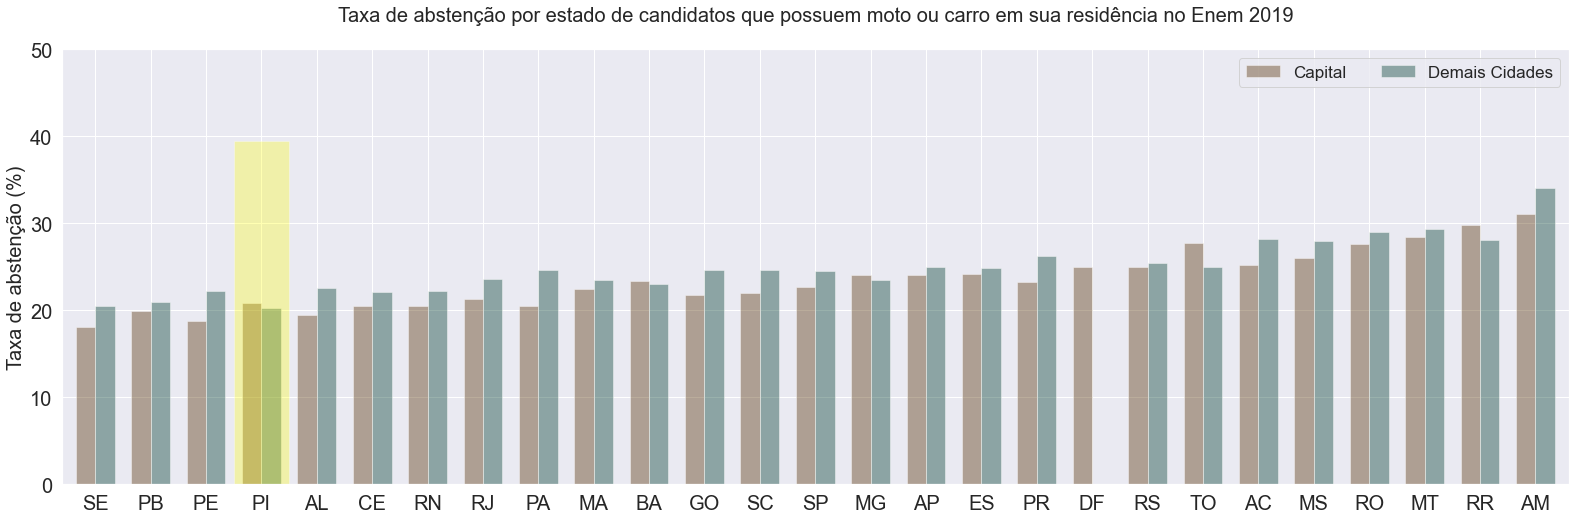

In [14]:
# Lista das capitais dos estados para serem utilizadas no filtro
capitais = ["Rio Branco", "Maceió", "Macapá", "Manaus", "Salvador", "Fortaleza",
"Vitória","Goiânia", "São Luís", "Cuiabá", "Campo Grande", "Belo Horizonte",
"Belém", "João Pessoa", "Curitiba", "Recife", "Teresina", "Rio de Janeiro", "Natal",
"Porto Alegre", "Porto Velho", "Boa Vista", "Florianópolis", "São Paulo", "Aracaju",
"Palmas", "Brasília"]

# Considerar apenas candidatos que possuem meios de transporte na residência
dados_candidatos_sem_transporte = df.query("Q010 != 'A' | Q011 != 'A'").copy()

# Considerar todos os candidatos que residem em capitais
dados_candidatos_capital = dados_candidatos_sem_transporte[dados_candidatos_sem_transporte['NO_MUNICIPIO_RESIDENCIA'].isin(capitais)].copy()

# Preencher a primeira parte do df que será utilizado no gráfico
dados_candidatos_abstencao = dados_candidatos_capital.copy()

# Atribuir o valor "Capital" para os candidatos que residem em capitais.
dados_candidatos_abstencao["CAPITAL_OU_NAO"] = 'Capital'

# Considerar e atribuir o valor "Demais Cidades" para todos os candidatos que não residem em capitais.
dados_candidatos_nao_capital = dados_candidatos_sem_transporte[~dados_candidatos_sem_transporte['NO_MUNICIPIO_RESIDENCIA'].isin(capitais)].copy()
dados_candidatos_nao_capital["CAPITAL_OU_NAO"] = 'Demais Cidades'

# Unir os dois dfs (candidatos de capitais e candidatos de não capitais)
dados_candidatos_abstencao = dados_candidatos_abstencao.append(dados_candidatos_nao_capital,ignore_index = True) 

# Criar um novo DataFrame para computar os dados.
taxa_abstencao = pd.DataFrame()

# Considerar os candidatos que faltaram em pelo menos uma das provas
taxa_abstencao["Capital"] = (dados_candidatos_abstencao.query("(TP_PRESENCA_CN == 0 | TP_PRESENCA_CH == 0 | TP_PRESENCA_LC == 0 | TP_PRESENCA_MT == 0) & CAPITAL_OU_NAO == 'Capital'")["SG_UF_RESIDENCIA"].value_counts() / \
                             dados_candidatos_abstencao.query("CAPITAL_OU_NAO == 'Capital'")["SG_UF_RESIDENCIA"].value_counts()*100)
taxa_abstencao["Demais Cidades"] = (dados_candidatos_abstencao.query("(TP_PRESENCA_CN == 0 | TP_PRESENCA_CH == 0 | TP_PRESENCA_LC == 0 | TP_PRESENCA_MT == 0) & CAPITAL_OU_NAO == 'Demais Cidades'")["SG_UF_RESIDENCIA"].value_counts() / \
                             dados_candidatos_abstencao.query("CAPITAL_OU_NAO == 'Demais Cidades'")["SG_UF_RESIDENCIA"].value_counts()*100)

# Ordenar pelos estados com menores taxas de abstenção
indice_ordenado = taxa_abstencao.mean(axis=1).sort_values(ascending=True).index 

# Atualizar o DataFrame com o índice ordenado
taxa_abstencao = taxa_abstencao.loc[indice_ordenado, :] 

# Parâmetros do gráfico
font_prop = font_manager.FontProperties(size=15) # Gerenciador da fonte do gráfico
Figura_8 = plt.figure(figsize=(27, 8))
sns.set_theme(style="darkgrid")
ax = Figura_8.add_subplot(111)
taxa_abstencao.plot(kind='bar', ax=ax, width=0.7, position=0.5, ylim=(0, 50),grid=True,fontsize=20,alpha=0.4,colormap='BrBG') 
ax.set_ylabel('Taxa de abstenção (%)',fontsize=20)
plt.legend(fontsize=20)

# Adicionar destaque amarelo para o estado do Piauí
ax.add_patch(Rectangle((3 - .5, 0 - .5), 1, 40, facecolor="yellow",alpha=0.3))

plt.title("Taxa de abstenção por estado de candidatos que possuem moto ou carro em sua residência no Enem 2019\n",fontsize=20)

# Rotacionar os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)

# Quebrar a legenda em 2 colunas
ax.legend(ncol=2,fontsize=17)

plt.show()

Desta vez, Sergipe foi o estado que apresentou a menor taxa de abstenção do Enem 2019 dentre os candidatos que possuem algum transporte próprio em suas residências.

Mas, no geral, considerando todos os candidatos, Piauí destaca-se quanto a este indicador há algum tempo, conforme a manchete a seguir:

<img src="img/noticia_taxa_presenca.jpg" alt="Drawing" style="width: 600px;"/>

**Fonte:** https://g1.globo.com/pi/piaui/noticia/2019/11/04/piaui-tem-maior-taxa-de-presenca-no-primeiro-dia-de-enem-pelo-4o-ano-consecutivo.ghtml

# 3. Conclusões

Diante do exposto, parece haver enorme vontade dos candidatos piauienses continuarem seus estudos no ensino superior público e gratuito, mas que, provavelmente, em decorrência da falta de investimento na educação pública, há um grande abismo entre os desempenhos e, consequentemente, entre as oportunidades alcançadas pelos candidatos oriundos de escolas públicas em relação àqueles de escolas particulares.

Este abismo pode ficar ainda maior se for ignorado pelo Estado.

Entretanto, este cenário da educação pública do Piauí não está, aparentemente, sendo desconsiderado, visto que a realidade nesse estado parece estar em plena transformação positiva. O último Ideb evidenciou enormes avanços, conforme consta na notícia a seguir:




![](https://drive.google.com/uc?export=view&id=1kEaIOaJo3IYX9Ea3DduMm3CKRdnZ9g9U)



**Fonte:** https://www.pi.gov.br/noticias/piaui-e-destaque-no-ideb-2019-e-avanca-em-todas-as-etapas-de-ensino/

Tal avanço na educação do Piauí ainda não foi refletido no Enem, conforme mostrado e explicado ao longo deste estudo; mas talvez seja apenas uma questão de tempo. Por ora, a comemoração por tal feito no último Ideb é mais do que justa: há de se reconhecer o esforço da população do Piauí que, mesmo diante de obstáculos no caminho, conseguiu um significativo crescimento em qualidade da educação pública estadual.

<img src="img/noticia_educacao_PI_2.jpg" alt="Drawing" style="width: 600px;"/>


**Fonte:** https://brasil.elpais.com/brasil/2020-09-20/interior-do-piaui-celebra-avanco-no-ideb-como-se-fosse-a-final-do-brasileirao-mas-impacto-da-pandemia-preocupa.html


# 4. Conteúdo extra e sugestões de trabalhos futuros

Conforme pôde ser notado, há uma grande diferença nas taxas de abstenção entre aqueles que possuem transporte (moto ou carro) em suas residências em comparação com aqueles que não possuem. Também notam-se diferenças, às vezes bastante consideráveis, entre os candidatos residentes nas capitais e os candidatos residentes nas demais regiões do estado.

As duas figuras seguintes trazem as mesmas análises apresentadas anteriormente, destacando-se a diferença da taxa de abstenção entre os candidatos que residem nas capitais e aqueles que habitam as demais regiões dos respectivos estados. Esta diferença é representada pelos números acima das colunas. Números marrons indicam abstenção maior na capital e números verdes apontam que a maior abstenção ocorreu nas demais cidades.

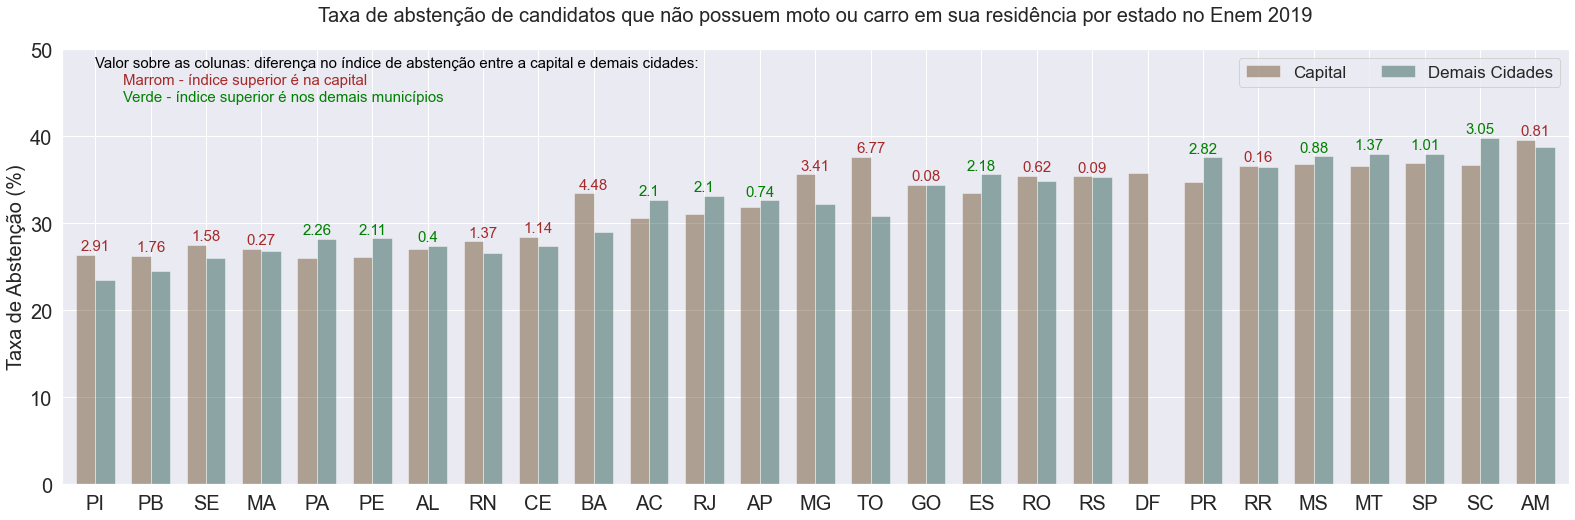

In [15]:
# Lista das capitais dos estados para serem utilizadas no filtro
capitais = ["Rio Branco", "Maceió", "Macapá", "Manaus", "Salvador", "Fortaleza",
"Vitória","Goiânia", "São Luís", "Cuiabá", "Campo Grande", "Belo Horizonte",
"Belém", "João Pessoa", "Curitiba", "Recife", "Teresina", "Rio de Janeiro", "Natal",
"Porto Alegre", "Porto Velho", "Boa Vista", "Florianópolis", "São Paulo", "Aracaju",
"Palmas", "Brasília"]

# Considerar apenas candidatos que não possuem meios de transporte na residência
dados_candidatos_sem_transporte = df.query("Q010 == 'A' & Q011 == 'A'").copy()

# Considerar todos os candidatos que residem em capitais
dados_candidatos_capital = dados_candidatos_sem_transporte[dados_candidatos_sem_transporte['NO_MUNICIPIO_RESIDENCIA'].isin(capitais)].copy()

# Preencher a primeira parte do df que será utilizado no gráfico
dados_candidatos_abstencao = dados_candidatos_capital.copy()

# Atribuir o valor "Capital" para os candidatos que residem em capitais.
dados_candidatos_abstencao["CAPITAL_OU_NAO"] = 'Capital'

# Considerar e atribuir o valor "Demais Cidades" para todos os candidatos que não residem em capitais.
dados_candidatos_nao_capital = dados_candidatos_sem_transporte[~dados_candidatos_sem_transporte['NO_MUNICIPIO_RESIDENCIA'].isin(capitais)].copy()
dados_candidatos_nao_capital["CAPITAL_OU_NAO"] = 'Demais Cidades'

# Unir os dois dfs (candidatos de capitais e candidatos de não capitais)
dados_candidatos_abstencao = dados_candidatos_abstencao.append(dados_candidatos_nao_capital,ignore_index = True)

# Criar um novo DataFrame para computar os dados.
taxa_abstencao = pd.DataFrame() 

# Considerar os candidatos que faltaram em pelo menos uma das provas
taxa_abstencao["Capital"] = (dados_candidatos_abstencao.query("(TP_PRESENCA_CN == 0 | TP_PRESENCA_CH == 0 | TP_PRESENCA_LC == 0 | TP_PRESENCA_MT == 0) & CAPITAL_OU_NAO == 'Capital'")["SG_UF_RESIDENCIA"].value_counts() / \
                             dados_candidatos_abstencao.query("CAPITAL_OU_NAO == 'Capital'")["SG_UF_RESIDENCIA"].value_counts()*100)
taxa_abstencao["Demais Cidades"] = (dados_candidatos_abstencao.query("(TP_PRESENCA_CN == 0 | TP_PRESENCA_CH == 0 | TP_PRESENCA_LC == 0 | TP_PRESENCA_MT == 0) & CAPITAL_OU_NAO == 'Demais Cidades'")["SG_UF_RESIDENCIA"].value_counts() / \
                             dados_candidatos_abstencao.query("CAPITAL_OU_NAO == 'Demais Cidades'")["SG_UF_RESIDENCIA"].value_counts()*100)

# Ordenar pelos estados com menores taxas de abstenção
indice_ordenado = taxa_abstencao.mean(axis=1).sort_values(ascending=True).index

# Atualizar o DataFrame com o índice ordenado
taxa_abstencao = taxa_abstencao.loc[indice_ordenado, :] 

# Parâmetros do gráfico
font_prop = font_manager.FontProperties(size=15) 
Figura_9 = plt.figure(figsize=(27, 8))
sns.set_theme(style="darkgrid")
ax = Figura_9.add_subplot(111) 
taxa_abstencao.plot(kind='bar', ax=ax, width=0.7, position=0.5, ylim=(0, 50),grid=True,fontsize=20,alpha=0.4,colormap='BrBG')
ax.set_ylabel('Taxa de Abstenção (%)',fontsize=20)
plt.legend(fontsize=20)
plt.title("Taxa de abstenção de candidatos que não possuem moto ou carro em sua residência por estado no Enem 2019\n",fontsize=20)

# Cálculo da diferença da taxa de abstenção entre residentes na capital e Demais Cidades
valores_diferenca = round(taxa_abstencao["Capital"] + (taxa_abstencao["Demais Cidades"]*(-1)),2) # Cálculo da diferença da taxa de abstenção da capital e Demais Cidades
valores_label = taxa_abstencao.max(axis=1) + 0.5

# Adicionar o valor numérico da diferença entre as taxas de abstenções acima das barras
for index, value in enumerate(valores_diferenca):
    if np.isnan(value) != True:
        if value >= 0:
            plt.text(index, valores_label[index],  str(abs(value)),horizontalalignment='center',color=('brown'),fontproperties=font_prop) # Colore de marro para índice de abstenção superior na capital.
        else:
            plt.text(index, valores_label[index], str(abs(value)),horizontalalignment='center',color=('green'),fontproperties=font_prop) # Colore de verde para índice de abstenção superior em Demais Cidades.

# Textos complementares no gráfico
plt.text(0, 48, "Valor sobre as colunas: diferença no índice de abstenção entre a capital e demais cidades:",horizontalalignment='left',color=('black'),fontproperties=font_prop)
plt.text(0.5, 46, "Marrom - índice superior é na capital",horizontalalignment='left',color=('brown'),fontproperties=font_prop)
plt.text(0.5, 44, "Verde - índice superior é nos demais municípios",horizontalalignment='left',color=('green'),fontproperties=font_prop)

# Rotacionar os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)

# Quebrar a legenda em 2 colunas
ax.legend(ncol=2,fontsize=17)

plt.show()

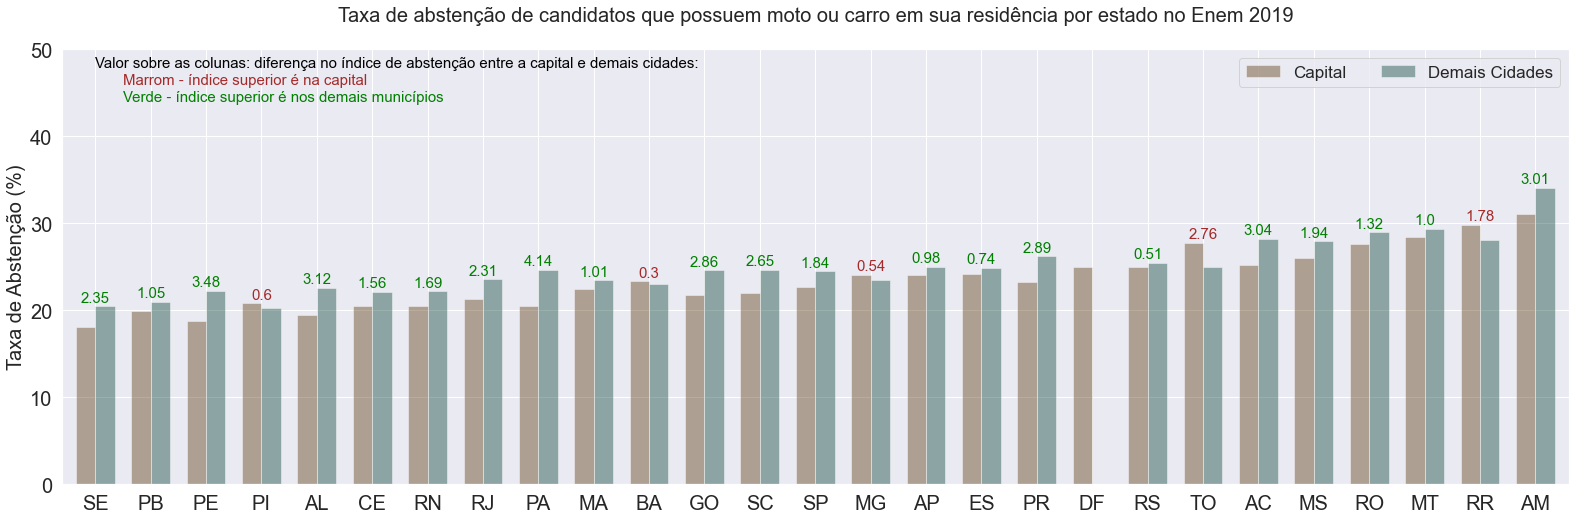

In [16]:
import matplotlib.font_manager as font_manager
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
import seaborn as sns

# Lista das capitais dos estados para serem utilizadas no filtro
capitais = ["Rio Branco", "Maceió", "Macapá", "Manaus", "Salvador", "Fortaleza",
"Vitória","Goiânia", "São Luís", "Cuiabá", "Campo Grande", "Belo Horizonte",
"Belém", "João Pessoa", "Curitiba", "Recife", "Teresina", "Rio de Janeiro", "Natal",
"Porto Alegre", "Porto Velho", "Boa Vista", "Florianópolis", "São Paulo", "Aracaju",
"Palmas", "Brasília"]

# Considerar apenas candidatos que possuem meios de transporte na residência
dados_candidatos_com_transporte = df.query("Q010 != 'A' | Q011 != 'A'").copy()

# Considerar todos os candidatos que residem em capitais
dados_candidatos_capital = dados_candidatos_com_transporte[dados_candidatos_com_transporte['NO_MUNICIPIO_RESIDENCIA'].isin(capitais)].copy()

# Preencher a primeira parte do df que será utilizado no gráfico
dados_candidatos_abstencao = dados_candidatos_capital .copy()

# Atribuir o valor "Capital" para os candidatos que residem em capitais.
dados_candidatos_abstencao["CAPITAL_OU_NAO"] = 'Capital'

# Considerar e atribuir o valor "Demais Cidades" para todos os candidatos que não residem em capitais
dados_candidatos_nao_capital = dados_candidatos_com_transporte[~dados_candidatos_com_transporte['NO_MUNICIPIO_RESIDENCIA'].isin(capitais)].copy()
dados_candidatos_nao_capital["CAPITAL_OU_NAO"] = 'Demais Cidades'

# Unir os dois dfs (candidatos de capitais e candidatos de não capitais)
dados_candidatos_abstencao = dados_candidatos_abstencao.append(dados_candidatos_nao_capital,ignore_index = True) # Unir os dois dfs (candidatos de capitais e candidatos de não capitais)

# Criar um novo DataFrame para computar os dados.
taxa_abstencao = pd.DataFrame()

# Considerar os candidatos que faltaram em pelo menos uma das provas
taxa_abstencao["Capital"] = (dados_candidatos_abstencao.query("(TP_PRESENCA_CN == 0 | TP_PRESENCA_CH == 0 | TP_PRESENCA_LC == 0 | TP_PRESENCA_MT == 0) & CAPITAL_OU_NAO == 'Capital'")["SG_UF_RESIDENCIA"].value_counts() / \
                             dados_candidatos_abstencao.query("CAPITAL_OU_NAO == 'Capital'")["SG_UF_RESIDENCIA"].value_counts()*100)
taxa_abstencao["Demais Cidades"] = (dados_candidatos_abstencao.query("(TP_PRESENCA_CN == 0 | TP_PRESENCA_CH == 0 | TP_PRESENCA_LC == 0 | TP_PRESENCA_MT == 0) & CAPITAL_OU_NAO == 'Demais Cidades'")["SG_UF_RESIDENCIA"].value_counts() / \
                             dados_candidatos_abstencao.query("CAPITAL_OU_NAO == 'Demais Cidades'")["SG_UF_RESIDENCIA"].value_counts()*100)

# Ordenar pelos estados com menores taxas de abstenção
indice_ordenado = taxa_abstencao.mean(axis=1).sort_values(ascending=True).index

# Atualizar o DataFrame com o índice ordenado
taxa_abstencao = taxa_abstencao.loc[indice_ordenado, :]

# Parâmetros do gráfico
font_prop = font_manager.FontProperties(size=15)
Figura_10 = plt.figure(figsize=(27, 8))
sns.set_theme(style="darkgrid")
ax = Figura_10.add_subplot(111) 
taxa_abstencao.plot(kind='bar', ax=ax, width=0.7, position=0.5, ylim=(0, 50),grid=True,fontsize=20,alpha=0.4,colormap='BrBG') # Plotar o gráfico da taxa de abstenção na Capital e Demais Cidades
ax.set_ylabel('Taxa de Abstenção (%)',fontsize=20)
plt.legend(fontsize=20)
plt.title("Taxa de abstenção de candidatos que possuem moto ou carro em sua residência por estado no Enem 2019\n",fontsize=20)

# Cálculo da diferença da taxa de abstenção entre residentes na capital e Demais Cidades
valores_diferenca = round(taxa_abstencao["Capital"] + (taxa_abstencao["Demais Cidades"]*(-1)),2) # Cálculo da diferença da taxa de abstenção da capital e Demais Cidades
valores_label = taxa_abstencao.max(axis=1) + 0.5

# Adicionar o valor numérico da diferença entre as taxas de abstenções acima das barras
for index, value in enumerate(valores_diferenca):
    if np.isnan(value) != True:
        if value >= 0:
            plt.text(index, valores_label[index],  str(abs(value)),horizontalalignment='center',color=('brown'),fontproperties=font_prop) # Colore de marrom para índice de abstenção superior na capital.
        else:
            plt.text(index, valores_label[index], str(abs(value)),horizontalalignment='center',color=('green'),fontproperties=font_prop) # Colore de verde para índice de abstenção superior nas Demais Cidades.

# Textos complementares no gráfico
plt.text(0, 48, "Valor sobre as colunas: diferença no índice de abstenção entre a capital e demais cidades:",horizontalalignment='left',color=('black'),fontproperties=font_prop)
plt.text(0.5, 46, "Marrom - índice superior é na capital",horizontalalignment='left',color=('brown'),fontproperties=font_prop)
plt.text(0.5, 44, "Verde - índice superior é nos demais municípios",horizontalalignment='left',color=('green'),fontproperties=font_prop)

# Rotacionar os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)

# Quebrar a legenda em 2 colunas
ax.legend(ncol=2,fontsize=17)

plt.show()

Nota-se que, para os candidatos que não possuem moto ou carro em suas residências, não há indicação clara de que os habitantes nas capitais tendem a se abster mais em relação àqueles que moram em outras cidades do estado. No entanto, não podemos deixar de notar que as três maiores diferenças de abstenções intraestaduais ocorreram em TO (Palmas), BA (Salvador) e MG (Belo Horizonte) cujas capitais superaram, respectivamente, em 6,77%, 4,48% e 3,41% as abstenções das demais cidades desses estados.

Por outro lado, para os candidatos que possuem moto ou carro em suas residências, as maiores taxas de abstenções por estado ocorreram nas cidades das demais regiões quase em sua totalidade; curiosamente, o Piauí é uma das poucas exceções. 

Uma hipótese para explicar tais resultados é que para os candidatos que não possuem meios de transporte em suas residências, a dificuldade em acessar os locais da prova, que já é maior por si só, podem ser semelhantes para locomoções intramunicipal ou intraestadual; por isso que, embora estes candidatos apresentem as maiores taxas de abstenções, elas são equilibradas quanto à região predominante nos diferentes estados. Enquanto para os candidatos que possuem meios de transporte em suas residências, a dificuldade, embora menor em comparação ao primeiro grupo, é maior se o local da prova é em outro município. Como informação adicional, apenas pouco mais de 30% dos municípios brasileiros aplicaram o Enem em 2019.


A terceira sugestão para futuros estudos é investigar melhor estes números; pode-se dividir cada estado em diversas outras regiões e entender melhor os locais onde as abstenções são maiores. A seguir, pode-se estudar a razão pela qual existem regiões onde a abstenção é maior e, então, propor soluções para diminuí-las.

Uma quarta sugestão de trabalho futuro surgiu após a leitura da última notícia presente neste estudo. Os avanços na educação do Piauí, evidenciados pelo avanço no último Ideb, podem ficar ameaçados pelas suspensões das aulas devido à pandemia e consequentes dificuldades do ensino à distância. Segundo a reportagem, a maioria dos alunos da rede pública do Piauí não têm acesso à internet.

Sugere-se, então, investigar um conjunto de indicadores que podem apontar os estados cuja educação ficará mais prejudicada devido à suspensão das aulas; um deles é o próprio acesso à internet pelos estudantes. Mas podem existir outros ou, então, pode-se pensar em novos indicadores e trabalhar para obtê-los. A seguir, propor junto aos governos planos de recuperação da educação pública, ajustados especificamente para cada estado, de acordo com os impactos previstos e revelados pelos indicadores previamente obtidos e trabalhados.